In [1]:
from attention_visualization import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='./SimHei.ttf')

In [2]:
model = Pretrainer(vocab_size=config["vocab_size"],
                   max_seq_len=256,
                   batch_size=1,
                   )

./output_wiki_bert/bert.model.epoch.3 loaded for evaluation!


In [3]:
text = "为什么要上班"
aa = model(text)

tensor([[   2,  132, 2112, 1236,   40,  179,  754,    3]])


In [4]:
aa[0].shape

(1, 12, 8, 8)

In [11]:
def plot_attention(text, attention_matrices, layer_num, head_num):
    labels = [i + " " for i in list(text)]
    labels = ["#CLS# ",] + labels + ["#SEP# ",]
    plt.figure(figsize=(8,8))
    plt.imshow(aa[layer_num][0][head_num])
    plt.yticks(range(len(labels)), labels, fontproperties=font, fontsize=18)
    plt.xticks(range(len(labels)), labels, fontproperties=font, fontsize=18)
    plt.show()

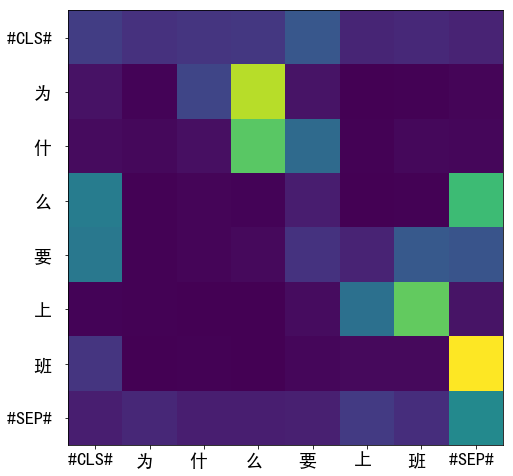

In [12]:
plot_attention(text,aa,  layer_num=2, head_num=1)

In [29]:
def plot_attention(text, attention_matrices, head_num):
    labels = [i + " " for i in list(text)]
    labels = ["#CLS# ",] + labels + ["#SEP# ",]
    plt.figure(figsize=(8,8))
    attention_matrix = np.sum(np.concatenate(attention_matrices, axis=0), axis=0)/6.
    print(attention_matrix.shape)
    plt.imshow(attention_matrix[head_num])
    plt.yticks(range(len(labels)), labels, fontproperties=font, fontsize=15)
    plt.xticks(range(len(labels)), labels, fontproperties=font, fontsize=15)
    plt.show()

(12, 8, 8)


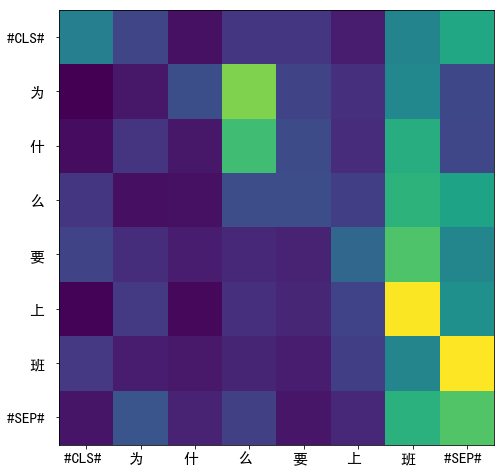

In [30]:
plot_attention(text, aa, head_num=1)

In [60]:
import re
txt = "而佛给客服#|#丰富收到fefdhasjhsdf\n12312#|#23123"

In [61]:
pos = [i.span() for i in re.finditer('#\|#', txt)]

In [68]:
for i in re.finditer('#\|#', txt):
    print(i.span())

(5, 8)
(30, 33)


In [71]:
for i in range((5, 8)):
    print(i)

TypeError: 'tuple' object cannot be interpreted as an integer

In [49]:
a = "123123123"
for i in re.finditer('12', a):
    print(i.span())

(0, 2)
(3, 5)
(6, 8)


In [63]:
for i in re.finditer('12', a):
    print(i)

<_sre.SRE_Match object; span=(0, 2), match='12'>
<_sre.SRE_Match object; span=(3, 5), match='12'>
<_sre.SRE_Match object; span=(6, 8), match='12'>
